In [10]:
import re
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def opener(fname):
    f = open(fname, encoding = 'utf-8')
    text = f.read()
    f.close()
    return text

def POS(input_file):
    file = opener(input_file)
    a = re.findall('_\t[A-Z]+?\t', file)
    clean_list = []
    for word in a:
        word = re.sub('_\t([A-Z]+?)\t', r'\1', word)
        clean_list.append(word)
    return clean_list

In [4]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

В true кладем изначальный файл, в pred - размеченный моделью:

In [19]:
true = POS('all_acts.conllu')
pred = POS('acts_tags.txt')
class_names = list(set(true))

In [18]:
cnf_matrix = confusion_matrix(true, pred)

Normalized confusion matrix


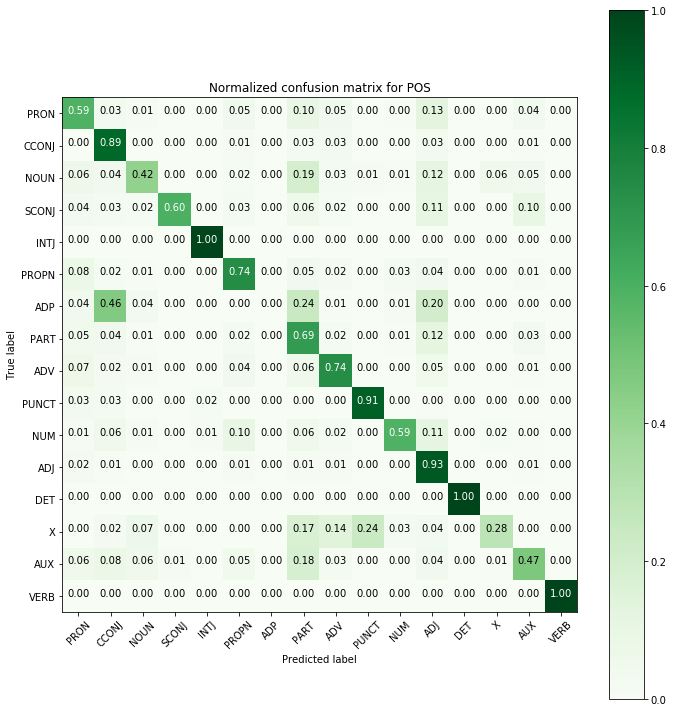

In [17]:
np.set_printoptions(precision=2)

plt.figure(figsize = (10,10))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix for POS')